In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
%matplotlib inline



In [3]:
from google.colab import files
uploaded = files.upload()

Saving ratings_Electronics.csv to ratings_Electronics.csv


In [4]:
import io
data = pd.read_csv(io.BytesIO(uploaded['ratings_Electronics.csv']),names=['UserID','ProdID','Rating','Time'])

In [5]:
data

,UserID,ProdID,Rating,Time
0,AKM1MP6P0OYPR,132793040,5,1365811200
1,A2CX7LUOHB2NDG,321732944,5,1341100800
2,A2NWSAGRHCP8N5,439886341,1,1367193600
3,A2WNBOD3WNDNKT,439886341,3,1374451200
4,A1GI0U4ZRJA8WN,439886341,1,1334707200
...,...,...,...,...
1048571,A1H16CBCNEL4G3,B000IF51UQ,5,1356739200
1048572,A1C2OANTC49AQI,B000IF51UQ,5,1382486400
1048573,A2JL0387FDDFS,B000IF51UQ,5,1340409600
1048574,A2KIYE5RF0OEMY,B000IF51UQ,4,1391212800


In [6]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048576 entries, 0 to 1048575
Data columns (total 4 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   UserID  1048576 non-null  object
 1   ProdID  1048576 non-null  object
 2   Rating  1048576 non-null  int64 
 3   Time    1048576 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 32.0+ MB


In [7]:
data.shape


(1048576, 4)

In [8]:
data.describe()

,Rating,Time
count,1.048576e+06,1.048576e+06
mean,3.973380e+00,1.248822e+09
std,1.399329e+00,1.091615e+08
min,1.000000e+00,9.127296e+08
25%,3.000000e+00,1.169078e+09
50%,5.000000e+00,1.250035e+09
75%,5.000000e+00,1.355789e+09
max,5.000000e+00,1.406074e+09


In [9]:
data=data.drop('Time',axis=1)

In [10]:
data

,UserID,ProdID,Rating
0,AKM1MP6P0OYPR,132793040,5
1,A2CX7LUOHB2NDG,321732944,5
2,A2NWSAGRHCP8N5,439886341,1
3,A2WNBOD3WNDNKT,439886341,3
4,A1GI0U4ZRJA8WN,439886341,1
...,...,...,...
1048571,A1H16CBCNEL4G3,B000IF51UQ,5
1048572,A1C2OANTC49AQI,B000IF51UQ,5
1048573,A2JL0387FDDFS,B000IF51UQ,5
1048574,A2KIYE5RF0OEMY,B000IF51UQ,4


The dimension 'Time' has been dropped as there can be no relevance for the recommendation systems.

In [11]:
data.isnull().sum()

UserID    0
ProdID    0
Rating    0
dtype: int64

There are no missing values in the dataset

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


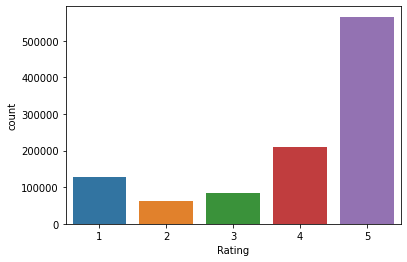

In [12]:
sns.countplot(data['Rating'])

The users have given a rating of 5 to most of the products( more than 5 lakh reviews).

In [13]:
print("Number of unique users" , len(np.unique(data.UserID)))
print("Number of unique products" , len(np.unique(data.ProdID)))

Number of unique users 786330
Number of unique products 61894


In [14]:
rate_user=data.groupby(by='UserID')['Rating'].count().sort_values(ascending=False)
rate_user

UserID
A5JLAU2ARJ0BO            412
A231WM2Z2JL0U3           249
A25HBO5V8S8SEA           164
A6FIAB28IS79             146
AT6CZDCP4TRGA            128
                        ... 
A3EEW1G63825UL             1
A3EEVD827ZC4JY             1
A3EEUZUBZQ4N4D             1
A3EEUT0F9898GS             1
A00037441I8XOQJSUWCAG      1
Name: Rating, Length: 786330, dtype: int64

In [15]:
rate_user.describe()

count    786330.000000
mean          1.333506
std           1.385612
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max         412.000000
Name: Rating, dtype: float64

In [16]:
print("Number of user who have give more than 40 reviews:", sum(rate_user>=40))

Number of user who have give more than 40 reviews: 72


There are about 10,48,756 records with 7,86,330 unique users and 61,894 unique products with more than 5 lakh products being rated 5. All records being absolute - with no null values in them. With a single product having a maximum of 412 reviews and a minimum and average of 1 review. There are are about 72 users who have given more than 40 reviews. 

In [17]:
#Creating a dataset with products which have more than  40 ratings
dat_40=data.groupby("ProdID").filter(lambda x:x['Rating'].count() >=40)

Creating a  sparse dataset with users who have given more than 40 reviews and the time variable is removed as it can be of no influence in the review.

In [ ]:
dat_40

,UserID,ProdID,Rating
183,A1BKC6B7YHYTVV,972683275,4
184,AWVFSIB42LHKJ,972683275,4
185,A36MQBNADRH8YY,972683275,5
186,A3SRXMPLAEZ6DP,972683275,4
187,A20XXTXWF2TCPY,972683275,5
...,...,...,...
1048571,A1H16CBCNEL4G3,B000IF51UQ,5
1048572,A1C2OANTC49AQI,B000IF51UQ,5
1048573,A2JL0387FDDFS,B000IF51UQ,5
1048574,A2KIYE5RF0OEMY,B000IF51UQ,4


These are the users that  frequently review products thereby making their reviews more dependable. Hereafter will be using this dataframe

In [ ]:
rate_prod = dat_40.groupby(by='ProdID')['Rating'].count().sort_values(ascending=False)
rate_prod

ProdID
B0002L5R78    9487
B0001FTVEK    5345
B000I68BD4    4903
B000BQ7GW8    4275
B00007E7JU    3523
              ... 
B00065ZK3G      40
B0002KR2RM      40
B00005444H      40
B0000DBMHR      40
B000EMWD9U      40
Name: Rating, Length: 4682, dtype: int64

In [ ]:
dat_40.groupby('ProdID')['Rating'].mean().head()


ProdID
1400501466    3.560000
1400501520    4.243902
1400501776    3.884892
1400532620    3.684211
1400532655    3.727273
Name: Rating, dtype: float64

In [ ]:
rate_count = pd.DataFrame(dat_40.groupby('ProdID')['Rating'].mean())


In [ ]:
rate_count['rating_counts'] = pd.DataFrame(dat_40.groupby('ProdID')['Rating'].count())
rate_count

,Rating,rating_counts
ProdID,,
1400501466,3.560000,250
1400501520,4.243902,82
1400501776,3.884892,139
1400532620,3.684211,171
1400532655,3.727273,484
...,...,...
B000IEN8QQ,4.531250,64
B000IEO964,4.533333,60
B000IF4788,4.189810,1001


In [ ]:
rate_count['rating_counts'].max()

9487

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


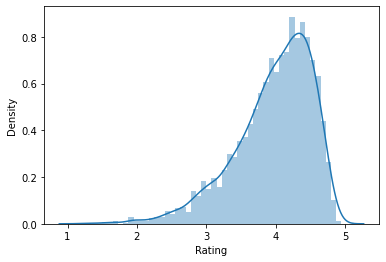

In [ ]:
sns.distplot(rate_count.Rating,bins=50)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


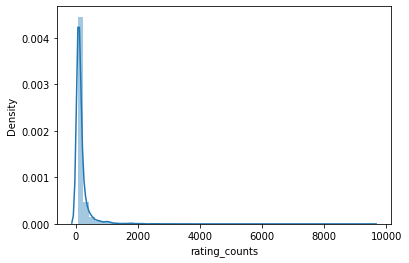

In [ ]:
sns.distplot(rate_count.rating_counts)

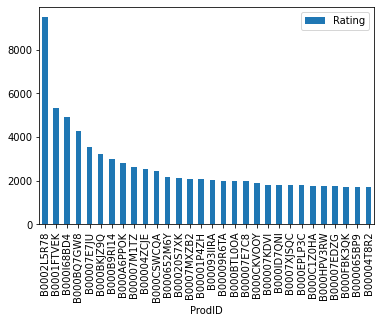

In [ ]:
popular_products = pd.DataFrame(dat_40.groupby('ProdID')['Rating'].count())
most_popular = popular_products.sort_values('Rating', ascending=False)
most_popular.head(30).plot(kind = "bar")

The Popular product is calculated with the most reviews and the highest rating, so the graph shows us the top 30 popular products.

In [ ]:
pip install surprise

     |████████████████████████████████| 11.8MB 3.2MB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp36-cp36m-linux_x86_64.whl size=1670927 sha256=c75516c57290c94350101f3f3ae8fe20c6ff306e675bb30c2fed92e689f568ac
  Stored in directory: /root/.cache/pip/wheels/78/9c/3d/41b419c9d2aff5b6e2b4c0fc8d25c538202834058f9ed110d0
Successfully built scikit-surprise


In [ ]:
from surprise import KNNWithMeans
from surprise import Dataset
from surprise import accuracy
from surprise import Reader
import os
from surprise.model_selection import train_test_split

Splitting the dataset using the surprise package with 70% as trainng set and 30% as test set.


In [ ]:
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(dat_40,reader)

In [ ]:
trainset, testset = train_test_split(data, test_size=0.3,random_state=1)

### Collabarative Filtering Model

In [ ]:
# Use user_based true/false to switch between user-based or item-based collaborative filtering

algo = KNNWithMeans(k=5, sim_options={'name': 'pearson_baseline', 'user_based': False})
algo.fit(trainset)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [ ]:
# running the trained model against the testset
test_pred = algo.test(testset)

In [ ]:
test_pred

[Prediction(uid='AEPK482YTX7UL', iid='B000068CS0', r_ui=5.0, est=4.04954041832258, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='AM1FWZ76OVLER', iid='B000HS3O2G', r_ui=1.0, est=4.04954041832258, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='A23LG3G7EBG2HU', iid='B00001P4ZH', r_ui=4.0, est=4.466032608695652, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='AKBG8GQ380TOL', iid='B000067RVJ', r_ui=3.0, est=4.04954041832258, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='AKI52RJUE6QOT', iid='B000EUGX70', r_ui=4.0, est=4.04954041832258, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='A31Y9YNTTGPJNI', iid='B000I13TBS', r_ui=5.0, est=4.04954041832258, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='A2DM55M17M1OWY', iid='B000BHQCP4', r_ui=2.0, e

In [ ]:
# get RMSE
print("Item-based Model : Test Set")
accuracy.rmse(test_pred, verbose=True)

Item-based Model : Test Set
RMSE: 1.3415


1.341519802602911

In [ ]:
new_df1=dat_40.head(10000)
ratings_matrix = new_df1.pivot_table(values='Rating', index='UserID', columns='ProdID', fill_value=0)
ratings_matrix.head()

ProdID,1400501466,1400501520,1400501776,1400532620,1400532655,140053271X,1400532736,1400599997,1400698987,3744295508,6301977173,7214047977,8862935293,9573212919,9575871979,9625993428,972683275,9888002198,9966694544,9983891212,9984984354,9985511476,B000001OM4,B000001OM5,B000001OMI,B000001ON6,B00000DM9W,B00000IGBF,B00000J05A,B00000J061,B00000J08Q,B00000J0D2,B00000J0D5,B00000J0D8,B00000J1EJ,B00000J1EP,B00000J1EQ,B00000J1F3,B00000J1GA,B00000J1QK,B00000J1QR,B00000J1SC,B00000J1TX,B00000J1U8,B00000J1UQ,B00000J1V3,B00000J1V5,B00000J3NF,B00000J3Q7,B00000J3UJ,B00000J434,B00000J4EY,B00000J4FS,B00000J4GE,B00000J6WY,B00000JBAT,B00000JBHP,B00000JBPB,B00000JCT8,B00000JCTO,B00000JD34,B00000JDF5,B00000JDF6,B00000JDHV,B00000JFE3,B00000JFIF,B00000JFMK,B00000JHWX,B00000JI4F,B00000JII6,B00000JMUG,B00000JPPI,B00000JSGF,B00000JYLO,B00000JYWQ,B00000K135
UserID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
A01852072Z7B68UHLI5UG,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
A0266076X6KPZ6CCHGVS,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
A0293130VTX2ZXA70JQS,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
A030530627MK66BD8V4LN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
A0571176384K8RBNKGF8O,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


As expected, the utility matrix obtaned above is sparce, I have filled up the unknown values wth 0.

In [ ]:
ratings_matrix.shape

(9832, 76)

Transposing the matrix



In [ ]:
X = ratings_matrix.T
X.head()

UserID,A01852072Z7B68UHLI5UG,A0266076X6KPZ6CCHGVS,A0293130VTX2ZXA70JQS,A030530627MK66BD8V4LN,A0571176384K8RBNKGF8O,A0590501PZ7HOWJKBGQ4,A0641581307AKT5MAOU0Q,A076219533YHEV2LJO988,A0821988FXKFYX53V4QG,A099626739FNCRNHIKBCG,A1003EYWAQFOUG,A100LLXMXDZHJZ,A10121433FMMZNY18RWZ8,A1013OEQCVS6AR,A1013Q8NLCY56R,A101DJDPGK0Q46,A101IWCCIWQWC9,A10285OSAM1MZK,A102IUFPXVDRB6,A102L0RVI4LHH3,A102RLOGIBBDMW,A102ZABPUPNYCT,A1038957GWRBP375RU5T,A103XY7DJYZHFN,A104VHQ06KFLDT,A1058D8UFZL711,A105AZN9C8UAOJ,A105TOJ6LTVMBG,A106YUCY4SVX1D,A1077JEY0CE3BB,A1079KKA0AXSL3,A107I2HYD2JZ5G,A1089S59XSJT2T,A108LYH0NZ9919,A108UXJTIV8XXY,A10956KAP9F1CO,A109ZR833WIFQS,A10BH1JDT6SNGA,A10BOETDPAFJ4C,A10CRW7XRJBJ2G,...,AZKKZ58QBXZUA,AZKOO6TVQBDAF,AZL95QPWJDM3Y,AZM8PD2KBVXN5,AZMCJ61JS6L3X,AZMY6E8B52L2T,AZN6Z0QRMZYX8,AZNMO6T8G0ZEU,AZNVF1G1GJRR4,AZO3DZAJ8S0D9,AZODG8OG0CETL,AZOFJX627J181,AZOPTWUSS6UM0,AZOTUFIYPVNDT,AZPPZOYTNLEN0,AZPT44204EODM,AZPT6K5K0IVCT,AZPYIAOEAV3OZ,AZQ2YSCWSKWX6,AZQ9DYG38GVBR,AZQJQBJ75DHMS,AZQOWHUHXMIMS,AZQQVI9RHJYH6,AZQTJ6HUS5L2Q,AZRPGTU8A7KD5,AZS8W54PXQ01W,AZSUNAT0BRQDU,AZTC7YC8PKG39,AZTC8ZV20NO1D,AZV9WA9MNT0FB,AZWOPBY75SGAM,AZX0ZDVAFMN78,AZX5LAN9JEAFF,AZX7I110AF0W2,AZXKUK895VGSM,AZXP46IB63PU8,AZYTSU42BZ7TP,AZZGJ2KMWB7R,AZZMV5VT9W7Y8,AZZST8OYL5P4Q
ProdID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1400501466,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1400501520,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1400501776,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1400532620,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1400532655,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,3,0,0,0


In [ ]:
X.shape

(76, 9832)

Unique products in subset of data



In [ ]:
X1=X

In [ ]:
#Decomposing the Matrix
from sklearn.decomposition import TruncatedSVD
SVD = TruncatedSVD(n_components=10)
decomposed_matrix = SVD.fit_transform(X)
decomposed_matrix.shape

(76, 10)

In [ ]:
#Correlation Matrix

correlation_matrix = np.corrcoef(decomposed_matrix)
correlation_matrix.shape

(76, 76)

In [ ]:
X.index[75]


'B00000K135'

Index number of product ID purchased by customer


In [ ]:
i = "B00000K135"

product_names = list(X.index)
product_ID = product_names.index(i)
product_ID

75

Correlation for all items with the item purchased by this customer based on items rated by other customers people who bought the same product

In [ ]:
correlation_product_ID = correlation_matrix[product_ID]
correlation_product_ID.shape

(76,)

Recommending top 25 highly correlated products in sequence

In [ ]:
Recommend = list(X.index[correlation_product_ID > 0.65])

# Removes the item already bought by the customer
Recommend.remove(i) 

Recommend[0:24]

['1400599997',
 '7214047977',
 '9575871979',
 '9983891212',
 '9984984354',
 'B00000IGBF',
 'B00000J08Q',
 'B00000J0D2',
 'B00000J0D5',
 'B00000J1SC',
 'B00000J1V3',
 'B00000J434',
 'B00000J4EY',
 'B00000J4FS',
 'B00000JCT8',
 'B00000JCTO',
 'B00000JFE3']

Here are the top 10 products to be displayed by the recommendation system to the above customer based on the purchase history of other customers in the website.